In [12]:
from PIL import Image
from rembg import remove
import os


def resize(im, new_width):
    width, height = im.size
    ratio = height / width
    new_height = int(ratio * new_width)
    resized_image = im.resize((new_width, new_height))
    resized_image = remove(resized_image)
    new_image = Image.new("RGB", resized_image.size, "white")
    new_image.paste(resized_image, (0, 0), resized_image)
    return new_image

# files = os.listdir("Input image")
# extensions = ['jpg', 'jpeg', 'png', 'gif']
# for file in files:
#     ext = file.split(".")[-1]
#     if ext in extensions:
#         im = Image.open("Input image/" + file)
#         im_resized = resize(im, 300)
#         filepath = f"Output image/{file}.png"
#         im_resized.save(filepath)

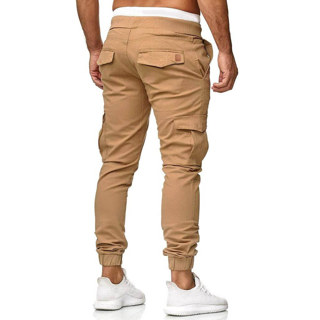

In [13]:
fp = './04.jpg'

img = Image.open(fp)
img.resize([int(i * 0.2) for i in img.size])

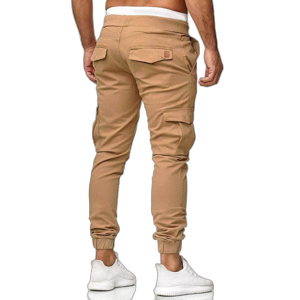

In [14]:
im_resized = resize(img, 300)
im_resized